## Задача 1

In [21]:
import os
import json
import urllib
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [4]:
import json

In [5]:
text = pd.read_json('letnyayashkola_vk.json', orient='records')

In [6]:
text.head()

,attachments,comments,date,from_id,id,is_favorite,is_pinned,likes,marked_as_ads,owner_id,post_source,post_type,reposts,text,textcomment,views,copy_history,signer_id,geo
0,"[{'link': {'caption': 'letnyayashkola.org', 'd...","{'can_post': 1, 'count': 0, 'groups_can_post':...",2020-03-18 18:10:37,-3618027,22546,False,1.0,"{'can_like': 1, 'can_publish': 1, 'count': 58,...",0,-3618027,{'type': 'vk'},post,"{'count': 3, 'user_reposted': 0}",Распространение пандемии COVID-19 набирает обо...,"{'count': 0, 'items': []}",{'count': 2160},NaN,NaN,NaN
1,[{'photo': {'access_key': '129ca55b933f5ff10f'...,"{'can_post': 1, 'count': 4, 'groups_can_post':...",2020-03-29 14:05:04,-3618027,22562,False,NaN,"{'can_like': 1, 'can_publish': 1, 'count': 57,...",0,-3618027,{'type': 'vk'},post,"{'count': 2, 'user_reposted': 0}","Уже в эту среду, 1 апреля, начнется набор на м...","{'count': 1, 'items': [{'date': 1585492486, 'f...",{'count': 1292},NaN,NaN,NaN
2,[{'photo': {'access_key': 'c6b01fc1ff748bd42d'...,"{'can_post': 1, 'count': 10, 'groups_can_post'...",2020-03-22 17:31:00,-3618027,22550,False,NaN,"{'can_like': 1, 'can_publish': 1, 'count': 66,...",0,-3618027,{'type': 'vk'},post,"{'count': 0, 'user_reposted': 0}","Тем временем, осталось 10 дней до начала прием...","{'count': 3, 'items': [{'date': 1584936727, 'f...",{'count': 2991},NaN,NaN,NaN
3,"[{'album': {'created': 1584277722, 'descriptio...","{'can_post': 1, 'count': 0, 'groups_can_post':...",2020-03-20 16:01:00,-3618027,22548,False,NaN,"{'can_like': 1, 'can_publish': 1, 'count': 20,...",0,-3618027,{'type': 'vk'},post,"{'count': 1, 'user_reposted': 0}",В прошедшую субботу в коворкинге «Таблица» на ...,"{'count': 0, 'items': []}",{'count': 1391},NaN,NaN,NaN
4,[{'photo': {'access_key': '6e6c0db01c5ce1401d'...,"{'can_post': 1, 'count': 2, 'groups_can_post':...",2020-03-15 14:14:00,-3618027,22540,False,NaN,"{'can_like': 1, 'can_publish': 1, 'count': 51,...",0,-3618027,{'type': 'vk'},post,"{'count': 0, 'user_reposted': 0}",#осталось_до #ЛШ2020,"{'count': 1, 'items': [{'date': 1584306000, 'f...",{'count': 3096},NaN,NaN,NaN


In [7]:
comments_list = []
for i in range(0, text.shape[0]):
    tree = text.iloc[i, :]['textcomment']
    for subtree in tree['items']:
        comments_list.append(subtree['text'])

In [8]:
comments_list[:8]

['В крайнем случае ЛШ тоже может уйти на дистанционку :)',
 'Список мастерских уже известен?',
 'Летняя школа платная?',
 'Здравствуйте! А разве лагеря не запретили, в связи с карантинами? У нас рекомендованно детей держать дома и не покидать регион. До конца мая обучение дистанционное.',
 'а когда выложат список мастерских?)',
 'А мне помнится, что автор:Слава Замыслов)',
 'передайте пикчеру. он лудший',
 'Почему летняя школа на придумывает себе название?']

In [12]:
text2 = ' '.join([w for w in comments_list]) 

In [13]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

Я добавила в шум помимо пунктуации и стопвордс - 'id'. Это слово встречается, когда пользователь тэгает другого пользователя, отвечая на комментарий. То есть никакого смысла оно не несет.

In [17]:
from nltk.corpus import stopwords
from string import punctuation
import re

stopwords_1 = stopwords.words('russian')
noise_1 = stopwords_1 + list(punctuation) + ['id']
text2_clean = re.sub('[0-9«»“„=.—*''``”\d]', '', text2)
text2_words = [token.lower()  for token in tk.tokenize(text2_clean) if token.lower() not in noise_1]


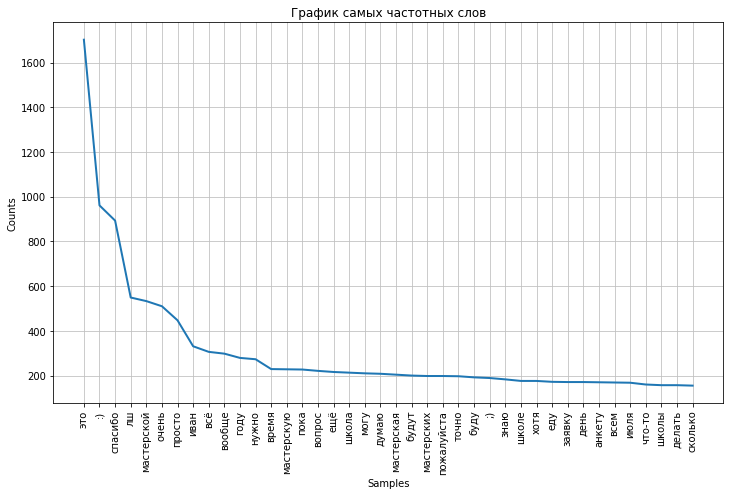

In [23]:
import nltk
plt.figure(figsize=(12, 7))
nlp_words = nltk.FreqDist(text2_words)
plt.title("График самых частотных слов")
nlp_words.plot(40)

Я решила использовать TweetTokenizer и оставить смайлики в частотном анализе, так как использование смайликов характеризует стиль общения аудитории. Как мы видим, комментаторы часто пишут радостные эмодзи.

Большой блок слов, характерных для Летней школы - "лш", "школа", "мастерская".
Также частое слово это "июля" - месяц проведения лш. 

Частое использование таких слов как "Спасибо", "пожалуйста","вопрос", "сколько", "могу" может быть показателем того, что многие комментарии в формате ответ-вопрос. Многие участники в основном в комментариях уточняют свои вопросы.
Скорее всего комментаторы больше всего здают вопросы про "заявку" и "анкету". Также есть глагол "еду", он тоже относится скорее всего к обсуждению процесса подготовки к поездке.

Ну и хоть и удалили стоп-слова, многие слова не очень полезны.


In [24]:
nlp_words

FreqDist({'это': 1702, ':)': 961, 'спасибо': 893, 'лш': 549, 'мастерской': 533, 'очень': 510, 'просто': 447, 'иван': 331, 'всё': 306, 'вообще': 298, ...})

## Задача 2.0

In [25]:
def rec(N):
    if N == 1:
        print(N)
    else:
        rec(N - 1)
        print(N)

In [26]:
rec(8)

1
2
3
4
5
6
7
8


## Задача 3

In [27]:
import urllib.request
url = "https://raw.githubusercontent.com/sergeychuvakin/ML-TEXTS/master/intro/female.txt"

text_female = urllib.request.urlopen(url).read().decode()

In [28]:
from nltk.tokenize import word_tokenize
female_tokenized = word_tokenize(text_female)

In [29]:
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"
stopwords = urllib.request.urlopen(url).read().decode()
stopwords = word_tokenize(stopwords)

In [30]:

noise = stopwords + list(punctuation)

In [31]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()
text_now = re.sub('[A-Za-z0-9«»“„=.*``”\d]', '', text_female)
text_now = re.sub('[\n\r]', ' ', text_now)
words = [token  for token in word_tokenize(text_now) if token.lower() not in noise]
wordlist = []
for word in words:
    #print(word)
    pa = pymorphy2_analyzer.parse(word)[0].normal_form
    wordlist.append(pa)
wordlist = [token  for token in wordlist if token.lower() not in noise]
wordlist


['\ufeff',
 '//',
 'российский',
 'социалистический',
 'федеративный',
 'республика',
 '_пролетарий',
 'соединяться',
 'женский',
 'международный',
 'движение',
 'сборник',
 'подарок',
 'крестьянка',
 'московский',
 'печатница',
 'издание',
 'московский',
 'губернский',
 'союз',
 'рабочий',
 'полиграфический',
 'производство',
 'право',
 'настоящий',
 'брошюра',
 'пускать',
 'продажа',
 'издание',
 'моск',
 'губа',
 'союз',
 'рабочий',
 'полиграфический',
 'производство',
 'л',
 'троцкий',
 'сталин',
 'н',
 'ленин',
 '-летие',
 'н',
 'ленин',
 'международный',
 'положение',
 'коммунистический',
 'интернационал',
 'речь',
 'произнести',
 '-м',
 'конгресс',
 'женский',
 'международный',
 'движение',
 'сборник',
 'ломский',
 'строить',
 'клуб-читальня',
 'ломский',
 'ванька',
 'сверчек',
 'рассказ',
 'типографский',
 'сохранение',
 'скот',
 'сохранить',
 'скот',
 'бескормица',
 'перечисленный',
 'являться',
 'подарок',
 'крестьянин',
 'московский',
 'печатник',
 'международный',
 'конфере

In [36]:
from collections import Counter
freq_dict_1 = Counter(wordlist)
freq_dict_sorted_1= sorted(freq_dict_1.items(), key=lambda x: -x[1])
freq_dict_sorted_1

[('движение', 28),
 ('рабочий', 27),
 ('борьба', 26),
 ('женский', 25),
 ('работница', 22),
 ('``', 21),
 ('партия', 20),
 ('организация', 19),
 ('социалистический', 17),
 ('конференция', 16),
 ('коммунистический', 12),
 ('союз', 11),
 ('масса', 11),
 ('социальный', 11),
 ('женщина-работница', 11),
 ('сербия', 11),
 ('резолюция', 10),
 ('революция', 10),
 ('интернационал', 9),
 ('политический', 9),
 ('революционный', 9),
 ('среди', 9),
 ('полный', 9),
 ('социализм', 9),
 ('освобождение', 9),
 ('сербский', 9),
 ('право', 8),
 ('положение', 8),
 ('труд', 8),
 ('капиталистический', 8),
 ('австралия', 8),
 ('еднакостя', 8),
 ('международный', 7),
 ('производство', 7),
 ('являться', 7),
 ('социалистка', 7),
 ('империалистический', 7),
 ('плата', 7),
 ('женщина-социалистка', 7),
 ('участие', 7),
 ('принимать', 7),
 ('делегация', 7),
 ('мужчина', 7),
 ('обычай', 7),
 ('югославия', 7),
 ('//', 6),
 ('общий', 6),
 ('вести', 6),
 ('победа', 6),
 ('класс', 6),
 ('болгарский', 6),
 ('профессиональ

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def makeImage(text):
   

    wc = WordCloud(background_color="white", max_words=20, width=1200, height=600)
    # generate word cloud
    wc.generate_from_frequencies(text)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wc, interpolation="bilinear")

    # show
    #plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

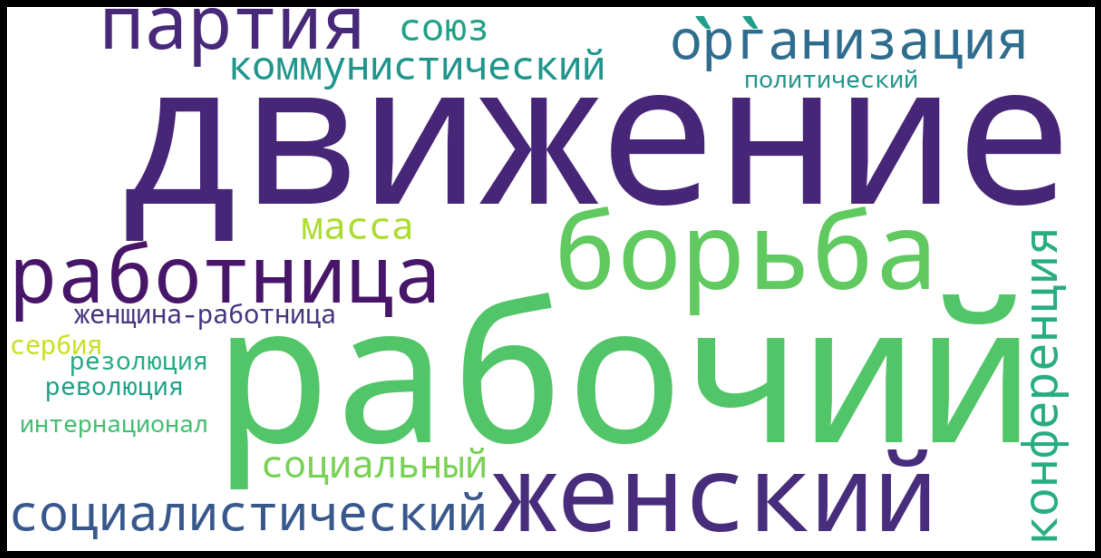

In [38]:
makeImage(dict(freq_dict_sorted_1))

## Задача 4

Я не очень поняла задачу( Получается, надо заменить все встречающиеся формы слов A на такие же формы слов B. Хотя построение форм у A и В может отличаться. Если мне встречается слово "мышце", то слово "мать" уже должно быть в форме "матери". Как это делать, я не понимаю. Поэтому предполагаю, что, возможно, задача только в том, чтобы менять только те формы, что в changes.

В файле много ссылок, я не стала их удалять.

In [39]:
with open("Язык (анатомия) — Википедия.txt",  encoding='utf8') as f:
    lines = f.readlines()
tongue = ' '.join([line for line in lines])

In [40]:
with open("Обыкновенный ёж — Википедия.txt",  encoding='utf8') as f:
    lines_yo = f.readlines()
yosh = ' '.join([line for line in lines_yo])

In [41]:
with open("Готы (субкультура) — Википедия.txt",  encoding='utf8') as f:
    lines_go = f.readlines()
got = ' '.join([line for line in lines_go])

In [42]:
united_text = ' '.join([tongue, yosh, got])

In [44]:
changes = pd.read_csv('changes.csv')

In [45]:
changes

,from,to
0,языка,носка
1,сосочки,сосиски
2,слизистой,пряной
3,язык,носок
4,мышца,мать
5,оболочка,клетка
6,и,авось
7,поверхности,кафеля
8,клеток,плотков
9,ежи,страусы


In [46]:
text_changed = united_text
for i in range (0, changes.shape[0]):
    name = changes.iloc[i, 0]
    text_changed = re.sub(r"\b{}\b".format(name), changes.iloc[i, 1], text_changed)
    text_changed = re.sub(r"\b{}\b".format(name.capitalize()), changes.iloc[i, 1].capitalize(), text_changed)

In [49]:
with open("otus.txt", "w") as file:
    file.write(text_changed)